In [70]:
#loading the datasets
import pandas as pd


df_calls = pd.read_csv('callsf0d4f5a.csv')  
df_reasons = pd.read_csv('reason18315ff.csv')  
df_sentiment = pd.read_csv('sentiment_statisticscc1e57a.csv') 
df_customers = pd.read_csv('customers2afd6ea.csv')  
df_test = pd.read_csv('testbc7185d.csv')  


In [71]:
# Check for missing values
missing_calls = df_calls.isnull().sum()
missing_customers = df_customers.isnull().sum()
missing_reasons = df_reasons.isnull().sum()
missing_sentiment = df_sentiment.isnull().sum()


In [72]:
# handling the missing values in customers table
df_customers.head(10)
missing_count = df_customers['elite_level_code'].isnull().sum()
df_customers['elite_level_code'] = df_customers['elite_level_code'].fillna(-1)
print(df_customers.isnull().sum())

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64


In [73]:
# handling the missing values in sentiments table
df_sentiment = df_sentiment.dropna(subset=['agent_tone', 'average_sentiment'])
df_sentiment.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,7.159300e+04,71593.000000,71593.000000,71593.000000
mean,4.993478e+09,564706.158814,-0.032592,0.285689
std,2.889637e+09,257520.519491,0.141484,0.191922
min,1.316420e+05,102574.000000,-0.940000,0.000000
25%,2.478796e+09,347606.000000,-0.110000,0.130000
50%,4.989537e+09,591778.000000,-0.020000,0.260000
75%,7.492895e+09,786323.000000,0.050000,0.410000
max,9.999806e+09,993862.000000,2.670000,0.980000


In [74]:
# Convert datetime columns in calls DataFrame
df_calls['call_start_datetime'] = pd.to_datetime(df_calls['call_start_datetime'])
df_calls['agent_assigned_datetime'] = pd.to_datetime(df_calls['agent_assigned_datetime'])
df_calls['call_end_datetime'] = pd.to_datetime(df_calls['call_end_datetime'])

In [75]:
# Clean call transcripts
df_calls['call_transcript'] = df_calls['call_transcript'].str.replace(r'\n', ' ').str.strip()


In [76]:
#datatype change
df_customers['elite_level_code'] = df_customers['elite_level_code'].astype(int)


In [77]:
# Calculating call duration in df_calls
df_calls['AHT'] = (df_calls['call_end_datetime'] - df_calls['call_start_datetime']).dt.total_seconds() / 60  # AHT in minutes
df_calls.describe()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,AHT
count,7.181000e+04,7.181000e+04,71810.000000,71810,71810,71810,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,2024-08-16 10:42:34.023116544,2024-08-16 10:49:51.090655744,2024-08-16 11:01:28.139256320,18.901936
min,1.316420e+05,1.197800e+04,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,3.000000
25%,2.480013e+09,2.514618e+09,347606.000000,2024-08-09 10:58:30,2024-08-09 11:07:15,2024-08-09 11:19:30,11.000000
50%,4.989448e+09,4.999664e+09,591778.000000,2024-08-17 09:02:00,2024-08-17 09:08:00,2024-08-17 09:20:00,15.000000
75%,7.493629e+09,7.509126e+09,786323.000000,2024-08-24 14:17:00,2024-08-24 14:24:45,2024-08-24 14:36:00,22.000000
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,129.000000
std,2.889673e+09,2.884255e+09,257532.362167,NaN,NaN,NaN,13.079690


In [78]:
# data pre-processing

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)


df_calls['cleaned_transcript'] = df_calls['call_transcript'].apply(preprocess_text)


df_calls[['call_transcript', 'cleaned_transcript']].head()

,call_transcript,cleaned_transcript
0,Agent: Thank you for calling United Airlines c...,Agent Thank calling United Airlines customer s...
1,"Agent: Thank you for calling United Airlines, ...",Agent Thank calling United Airlines name Sam I...
2,Agent: Thank you for calling United Airlines c...,Agent Thank calling United Airlines customer s...
3,Agent: Thank you for calling United Airlines c...,Agent Thank calling United Airlines customer s...
4,Agent: Thank you for calling United Airlines c...,Agent Thank calling United Airlines customer s...


In [79]:
df_calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,cleaned_transcript
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,Agent: Thank you for calling United Airlines c...,38.0,Agent Thank calling United Airlines customer s...
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"Agent: Thank you for calling United Airlines, ...",15.0,Agent Thank calling United Airlines name Sam I...
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,Agent: Thank you for calling United Airlines c...,27.0,Agent Thank calling United Airlines customer s...
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,Agent: Thank you for calling United Airlines c...,12.0,Agent Thank calling United Airlines customer s...
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,Agent: Thank you for calling United Airlines c...,19.0,Agent Thank calling United Airlines customer s...


In [80]:
# Merge sentiment data with df_calls
df_calls = df_calls.merge(df_sentiment[['call_id', 'average_sentiment','customer_tone']], on='call_id', how='left')

# Merge call reasons
df_calls = df_calls.merge(df_reasons[['call_id', 'primary_call_reason']], on='call_id', how='left')

# Merge customer data
df_calls = df_calls.merge(df_customers, on='customer_id', how='left')

In [81]:
# Clean the 'primary_call_reason' column
import re

df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.strip()  # Remove leading/trailing spaces
df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.lower()  # Convert to lowercase


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace('-', ' ')  # Replace hyphens with spaces


df_calls['primary_call_reason'] = df_calls['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)


print(df_calls['primary_call_reason'].unique())


['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' nan 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'products and services']


In [82]:
# Drop rows where primary_call_reason is NaN
df_dropped = df_calls[df_calls['primary_call_reason'].isna()]

df_calls= df_calls.dropna(subset=['primary_call_reason'])

# Check how many rows were dropped
print(f"Rows after cleaning: {len(df_calls)}")


Rows after cleaning: 66653


In [83]:
df_calls['call_duration'] = df_calls['call_end_datetime'] - df_calls['call_start_datetime']

In [84]:
df_calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,cleaned_transcript,average_sentiment,customer_tone,primary_call_reason,customer_name,elite_level_code,call_duration
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,Agent: Thank you for calling United Airlines c...,38.0,Agent Thank calling United Airlines customer s...,-0.04,angry,voluntary cancel,Matthew Foster,4,0 days 00:38:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"Agent: Thank you for calling United Airlines, ...",15.0,Agent Thank calling United Airlines name Sam I...,0.02,neutral,booking,Tammy Walters,-1,0 days 00:15:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,Agent: Thank you for calling United Airlines c...,27.0,Agent Thank calling United Airlines customer s...,-0.13,polite,irrops,Jeffery Dixon,-1,0 days 00:27:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,Agent: Thank you for calling United Airlines c...,12.0,Agent Thank calling United Airlines customer s...,-0.20,frustrated,upgrade,David Wilkins,2,0 days 00:12:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,Agent: Thank you for calling United Airlines c...,19.0,Agent Thank calling United Airlines customer s...,-0.05,polite,seating,Elizabeth Daniels,0,0 days 00:19:00


In [85]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_text = vectorizer.fit_transform(df_calls['cleaned_transcript'])

X = X_text


y = df_calls['primary_call_reason']




In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_val)


In [87]:
print(y_pred)

['irrops' 'voluntary change' 'irrops' ... 'irrops' 'irrops'
 'voluntary change']


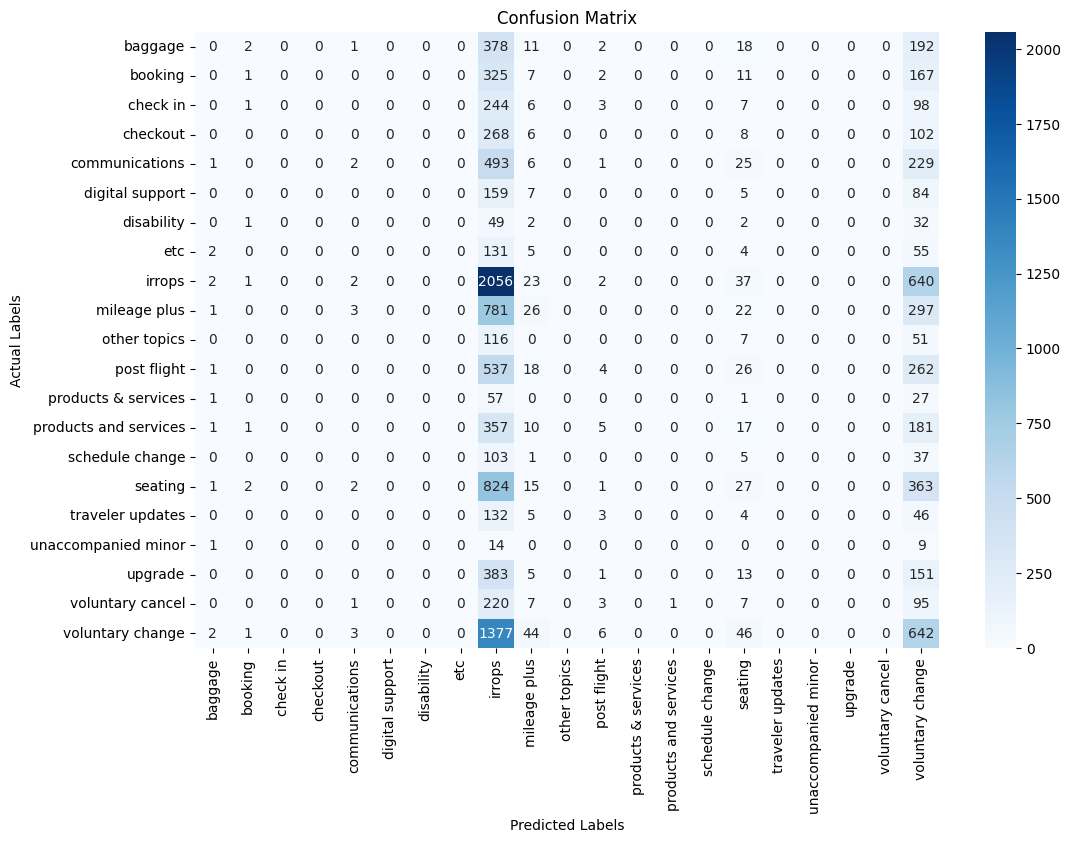

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [89]:
# prepairing the test 
df_test = df_test.merge(df_dropped, on='call_id', how='left')
df_test.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,cleaned_transcript,average_sentiment,customer_tone,primary_call_reason,customer_name,elite_level_code
0,7732610078,4029953261,488324,2024-08-01 00:23:00,2024-08-01 00:34:00,2024-08-01 01:32:00,Agent: Thank you for calling United Airlines c...,69.0,Agent Thank calling United Airlines customer s...,-0.06,neutral,NaN,Cassandra Flores,-1
1,2400299738,2034858976,963118,2024-08-01 01:33:00,2024-08-01 01:41:00,2024-08-01 01:54:00,"Agent: Thank you for calling United Airlines, ...",21.0,Agent Thank calling United Airlines name Adam ...,0.01,angry,NaN,Hannah Drake,0
2,6533095063,1874845993,519057,2024-08-01 02:17:00,2024-08-01 02:27:00,2024-08-01 02:29:00,Agent: Thank you for calling United Airlines c...,12.0,Agent Thank calling United Airlines customer s...,0.00,calm,NaN,Larry Nolan,-1
3,7774450920,2633426588,963118,2024-08-01 02:49:00,2024-08-01 02:53:00,2024-08-01 02:57:00,"Agent: Thank you for calling United Airlines, ...",8.0,Agent Thank calling United Airlines David I he...,0.02,angry,NaN,Shelby Wright,-1
4,9214147168,8334856492,158319,2024-08-01 02:49:00,2024-08-01 02:55:00,2024-08-01 02:59:00,Agent: Thank you for calling United Airlines c...,10.0,Agent Thank calling United Airlines customer s...,-0.12,frustrated,NaN,Mr. Thomas Simmons,3


In [90]:
#predicting the reasons
X_test = vectorizer.fit_transform(df_test['cleaned_transcript'])


y_pred = model.predict(X_test)


In [93]:
#creating a column for predicted reasons
df_test['predicted_call_reason'] = y_pred

In [102]:
# saving the predicted results
df_test[['call_id', 'predicted_call_reason']].to_csv('Global Brains at the Key (GBAK).csv', index=False)
